Fullname: Nguyễn Quốc Huy

Student ID: 20127188

# HW3: CUDA Memory

**To compile your file, you can use this command:** \
`nvcc filename.cu -o execute_filename` \
***You can use Vietnamese to anwser the questions***

You can add/delete cells as you see fit. Just don't delete the cells with the Teacher's words.

---

Below is the command to install `Nsight system` on Colab. You just need to run the cell.

In [ ]:
# Here is the command to install Nsight system on Colab. You just need to run the cell.
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt update
!apt install ./nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt --fix-broken install

- The above installation will be remove when colab restart its runtime. It should be fine for this homework because we don't use Nsight system that much.
- But if you want to persistent install Nsight system, you mount space from your Google Drive to your Colab VM. Read [Here](https://stackoverflow.com/questions/76784746/how-to-use-nsys-in-google-colab) for guidelines how to do thhis.

---

## Question 1

In [27]:
!nvcc HW3_P1.cu -o HW3

In [28]:
!./HW3 in.pnm out.pnm

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835398144 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 16x16, grid size 32x32
Kernel time: 0.464544 ms
Error: 0.000703

Kernel 2, block size 16x16, grid size 32x32
Kernel time: 0.305728 ms
Error: 0.000703

Kernel 3, block size 16x16, grid size 32x32
Kernel time: 0.231520 ms
Error: 0.000703


Trong Kernel 1, thuật toán có thể đọc các pixel đầu vào trực tiếp từ bộ nhớ chung cho mỗi lần tính toán. Thời gian thực hiện tương đối cao hơn vì truy cập bộ nhớ chung có thể chậm hơn so với bộ nhớ dùng chung.

Trong Kernel 2, bộ nhớ dùng chung (SMEM) được sử dụng. Bộ nhớ dùng chung nhanh hơn bộ nhớ chung vì nó có độ trễ thấp hơn và băng thông cao hơn. Mỗi khối tải một phần pixel đầu vào vào bộ nhớ dùng chung và các luồng trong khối sau đó có thể truy cập vào bộ nhớ dùng chung này, giảm số lượng truy cập bộ nhớ chung. Việc giảm thời gian truy cập bộ nhớ này dẫn đến giảm thời gian thực hiện.

Trong Kernel 3, bộ nhớ cố định (CMEM) được sử dụng cho bộ lọc. Bộ nhớ cố định ở dạng chỉ đọc và được lưu vào bộ nhớ đệm, điều này có thể dẫn đến thời gian truy cập nhanh hơn đối với dữ liệu chỉ đọc như bộ lọc. Vì bộ lọc được lưu trữ trong bộ nhớ không đổi nên mỗi luồng có thể truy cập nó một cách hiệu quả mà không cần phải tải nó vào bộ nhớ dùng chung hoặc tìm nạp lại nó từ bộ nhớ chung nhiều lần. Điều này có thể dẫn đến việc giảm thêm thời gian thực hiện.

## Question 2

In [19]:
!nvcc HW3_P2.cu -o HW3_P2

In [24]:
!./HW3_P2 512 1

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 18.425568 ms

CORRECT :)


In [21]:
 !./HW3_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 15.111968 ms

CORRECT :)


In [25]:
# Generate report with nsight system
!nsys profile ./HW3_P2 512 1

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 16.841633 ms

CORRECT :)
Generating '/tmp/nsys-report-1ccf.qdstrm'
[1/1] [========================100%] report4.nsys-rep
Generated:
    /content/report4.nsys-rep


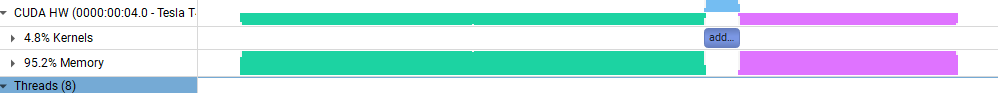

In [26]:
!nsys profile ./HW3_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 14.033888 ms

CORRECT :)
Generating '/tmp/nsys-report-9847.qdstrm'
[1/1] [========================100%] report5.nsys-rep
Generated:
    /content/report5.nsys-rep


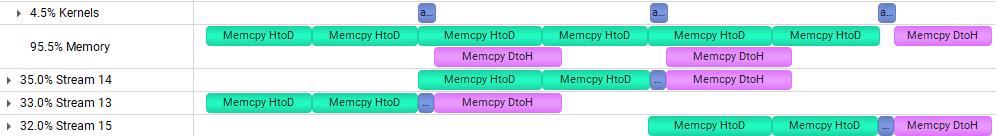